In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


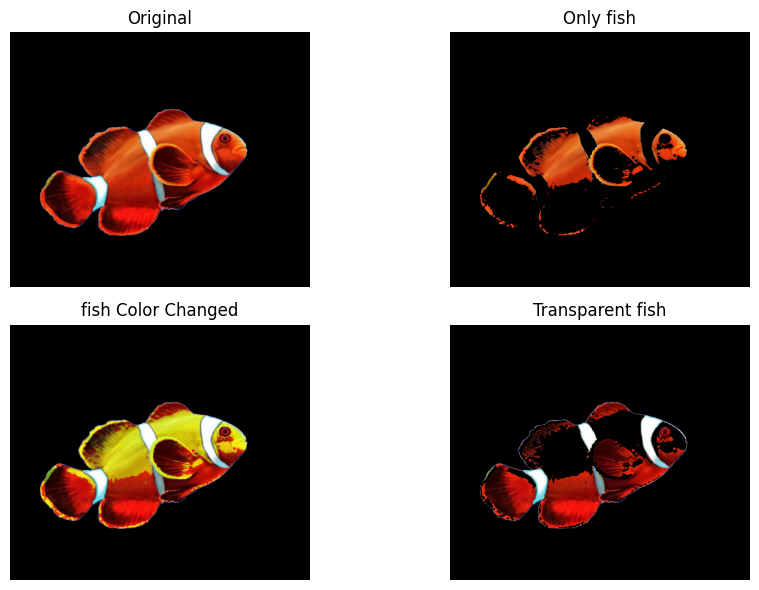

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('/content/drive/MyDrive/images/ikann.png')
bck = cv2.imread('/content/drive/MyDrive/images/bground.jpg')


bck = cv2.resize(bck, (img.shape[1], img.shape[0]))


hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


mask = cv2.inRange(hsv, (5, 50, 50), (25, 255, 255))
imask = mask > 0


only_unta = np.zeros_like(img)
only_unta[imask] = img[imask]


yellow = img.copy()
hsv[..., 0] = hsv[..., 0] + 20
yellow[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
yellow = np.clip(yellow, 0, 255)


imask_uint8 = imask.astype(np.uint8) * 255
nounta = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(imask_uint8))
nounta = cv2.add(nounta, cv2.bitwise_and(bck, bck, mask=imask_uint8))

# Konversi gambar ke RGB untuk ditampilkan di matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
only_unta_rgb = cv2.cvtColor(only_unta, cv2.COLOR_BGR2RGB)
yellow_rgb = cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)
nounta_rgb = cv2.cvtColor(nounta, cv2.COLOR_BGR2RGB)

# Menampilkan hasil
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Original")
axes[0, 1].imshow(only_unta_rgb)
axes[0, 1].set_title("Only fish")
axes[1, 0].imshow(yellow_rgb)
axes[1, 0].set_title("fish Color Changed")
axes[1, 1].imshow(nounta_rgb)
axes[1, 1].set_title("Transparent fish")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()